## Task 2

### Punto 1

In [1]:
!pip install gymnasium matplotlib

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/953.9 kB ? eta -:--:--
    -------------------------------------- 20.5/953.9 kB 682.7 kB/s eta 0:00:02
   - ------------------------------------- 41.0/953.9 kB 653.6 kB/s eta 0:00:02
   ----- ---------------------------------- 122.9/953.9 kB 1.0 MB/s eta 0:00:01
   --------- ------------------------------ 225.3/953.9 kB 1.5 MB/s eta 0:00:01
   ---------------- ----------------------- 399.4/953.9 kB 2.3 MB/s eta 0:00:01
   ------------------------- -------------- 614.4/953.9 kB 2.8 MB/s eta 0:00:01
   ---------------------------------------- 953.9/953.9 kB 3.8 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.3.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


### Punto 2

In [2]:
import numpy as np
import gymnasium as gym
import matplotlib.pyplot as plt

### Punto 3

In [3]:
env = gym.make("CliffWalking-v0")

alpha = 0.1  # tasa de aprendizaje
gamma = 0.99  # factor de descuento
epsilon = 0.1  # política epsilon-greedy
n_episodes = 500


### Punto 4

In [4]:
def sarsa(env, alpha, gamma, epsilon, n_episodes):
    Q = np.zeros((env.observation_space.n, env.action_space.n))
    rewards_per_episode = []

    for episode in range(n_episodes):
        state, _ = env.reset()
        action = np.random.choice(env.action_space.n) if np.random.rand() < epsilon else np.argmax(Q[state])

        total_reward = 0
        done = False

        while not done:
            next_state, reward, done, _, _ = env.step(action)
            next_action = np.random.choice(env.action_space.n) if np.random.rand() < epsilon else np.argmax(Q[next_state])

            Q[state, action] += alpha * (reward + gamma * Q[next_state, next_action] - Q[state, action])

            state, action = next_state, next_action
            total_reward += reward

        rewards_per_episode.append(total_reward)

    return rewards_per_episode

### Punto 5

In [5]:
def q_learning(env, alpha, gamma, epsilon, n_episodes):
    Q = np.zeros((env.observation_space.n, env.action_space.n))
    rewards_per_episode = []

    for episode in range(n_episodes):
        state, _ = env.reset()

        total_reward = 0
        done = False

        while not done:
            action = np.random.choice(env.action_space.n) if np.random.rand() < epsilon else np.argmax(Q[state])
            next_state, reward, done, _, _ = env.step(action)

            best_next_action = np.argmax(Q[next_state])
            Q[state, action] += alpha * (reward + gamma * Q[next_state, best_next_action] - Q[state, action])

            state = next_state
            total_reward += reward

        rewards_per_episode.append(total_reward)

    return rewards_per_episode

### Punto 6

In [6]:
sarsa_rewards = sarsa(env, alpha, gamma, epsilon, n_episodes)
q_learning_rewards = q_learning(env, alpha, gamma, epsilon, n_episodes)

### Punto 7 y 8

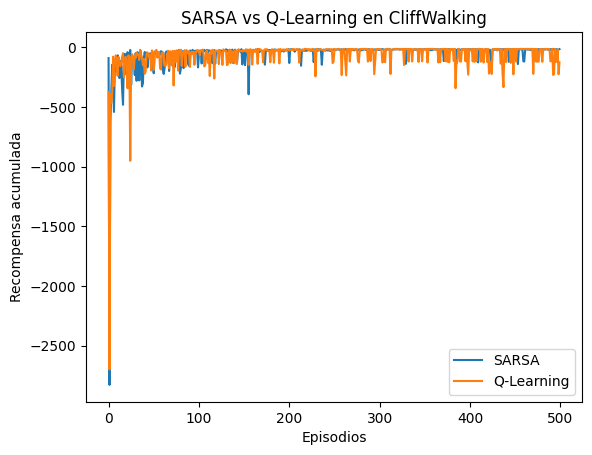

In [7]:
plt.plot(sarsa_rewards, label='SARSA')
plt.plot(q_learning_rewards, label='Q-Learning')
plt.xlabel('Episodios')
plt.ylabel('Recompensa acumulada')
plt.legend()
plt.title('SARSA vs Q-Learning en CliffWalking')
plt.show()

### Punto 9

1. ¿Qué diferencias observa en los patrones de recompensa entre SARSA y Q-Learning?

SARSA tiene recompensas acumuladas más estables y menos fluctuaciones después de la fase inicial de aprendizaje. Esto sugiere que SARSA es más conservador en su proceso de toma de decisiones.
Q-Learning tiende a experimentar más oscilaciones en las recompensas, incluso después de haber convergido. Esto puede indicar que Q-Learning, al ser más "optimista", toma decisiones más arriesgadas, lo que a veces lleva a obtener recompensas más variables.

2. ¿Por qué Q-Learning tiende a ser más optimista en sus actualizaciones de valor Q en comparación con SARSA?

Q-Learning es más optimista porque actualiza sus valores Q basándose en el valor máximo de la siguiente acción posible (la mejor acción según el modelo actual). Esto significa que siempre asume que se tomará la mejor acción en el futuro, lo que puede llevar a una sobreestimación de los valores Q. En contraste, SARSA actualiza los valores Q en función de la acción que realmente se toma, lo que tiende a ser un enfoque más conservador.

3. ¿Cómo afecta la naturaleza "on-policy" de SARSA a su proceso de aprendizaje en comparacióncon la naturaleza "off-policy" de Q-Learning?

La naturaleza "on-policy" de SARSA significa que el algoritmo aprende sobre la política que realmente sigue durante el entrenamiento. Esto lo hace más estable y seguro, ya que siempre está ajustando los valores Q en base a las acciones que efectivamente se ejecutan. Por otro lado, Q-Learning es "off-policy", lo que significa que aprende sobre una política óptima independientemente de las acciones que realmente toma durante el entrenamiento. Esto puede hacer que Q-Learning aprenda más rápido, pero también lo hace más propenso a tomar decisiones que no siempre reflejan la política seguida, lo que puede llevar a fluctuaciones en las recompensas.

4. Según las penalizaciones y recompensas del entorno, ¿qué algoritmo parece aprender el camino más seguro? ¿Por qué?

SARSA parece aprender el camino más seguro. Esto se debe a que SARSA, al ser "on-policy", ajusta los valores Q en función de las acciones que realmente toma durante el entrenamiento. Esto hace que SARSA sea más consciente de las penalizaciones inmediatas (como caer en el acantilado) y, por lo tanto, evite caminos peligrosos. Q-Learning, aunque puede ser más rápido en encontrar una solución óptima, es más propenso a sobreestimar los valores Q y, como resultado, puede tomar decisiones más arriesgadas.

5. ¿Cómo podría afectar la disminución de épsilon con el tiempo al rendimiento de cada algoritmo?

En SARSA, una disminución de épsilon resultará en un enfoque más conservador, donde el algoritmo seguirá con más frecuencia las acciones que ya ha identificado como seguras, lo que puede estabilizar aún más las recompensas acumuladas.
En Q-Learning, una disminución de épsilon puede acelerar la convergencia hacia una política óptima, ya que el algoritmo comenzará a explotar más sus valores Q optimistas. Sin embargo, si esos valores Q están sobreestimados debido a una exploración insuficiente, esto podría llevar a un rendimiento subóptimo a largo plazo.

1. ¿Cuál es el valor estimado de mantener diferentes niveles de existencias para cada producto?

El valor estimado de mantener diferentes niveles de existencias para cada producto depende de varios factores, como la demanda del producto, los costos de almacenamiento, el riesgo de escasez, y el costo de oportunidad de capital invertido en el inventario. A menudo, este valor se determina utilizando modelos de inventario como el Modelo de Cantidad Económica de Pedido (EOQ) o políticas como el modelo de revisión continua (Q, r), donde:

Niveles altos de existencias: Pueden reducir el riesgo de quedarse sin productos (stockout), lo que es beneficioso para productos de alta demanda o con un alto costo de falta de stock. Sin embargo, también implica mayores costos de almacenamiento.

Niveles bajos de existencias: Pueden minimizar los costos de almacenamiento, pero aumentan el riesgo de escasez y posibles ventas perdidas, especialmente si la demanda es incierta.

El equilibrio adecuado en los niveles de existencias maximiza la rentabilidad al minimizar los costos totales, incluyendo los costos de almacenamiento, el costo de los pedidos, y el costo de oportunidad por ventas perdidas debido a la escasez.

2. ¿Cómo afecta el valor epsilon en la política blanda al rendimiento?

El valor epsilon (ε) en una política epsilon-greedy afecta cómo un algoritmo de aprendizaje refuerza el equilibrio entre exploración y explotación:

Epsilon alto (cercano a 1): El algoritmo prioriza la exploración, lo que significa que el agente tomará acciones aleatorias más frecuentemente. Esto puede ser beneficioso al inicio del entrenamiento, permitiendo al agente explorar el espacio de soluciones de manera amplia. Sin embargo, si ε permanece alto durante demasiado tiempo, puede impedir que el agente explote las políticas que ha aprendido, lo que podría conducir a un rendimiento subóptimo.

Epsilon bajo (cercano a 0): El agente tiende a explotar más las acciones que ya conoce como buenas (según su estimación). Esto puede ser beneficioso una vez que el agente ha explorado suficiente el entorno, permitiéndole aprovechar las mejores acciones conocidas para maximizar la recompensa. Sin embargo, si ε es demasiado bajo desde el inicio, el agente podría no explorar lo suficiente y quedar atrapado en una política subóptima.

Por lo tanto, un enfoque común es disminuir epsilon con el tiempo (annealing), comenzando con un valor alto para promover la exploración y reduciéndolo gradualmente para permitir más explotación a medida que el agente aprende.

3. ¿Cuál es el impacto de utilizar el aprendizaje fuera de la política en comparación con el aprendizaje dentro de la política?

El aprendizaje fuera de la política (off-policy), como en Q-Learning, permite una exploración más agresiva y puede converger más rápidamente a una política óptima, ya que aprende de una política diferente a la que utiliza para seleccionar acciones; sin embargo, esto puede llevar a una mayor variabilidad y riesgo. Por otro lado, el aprendizaje dentro de la política (on-policy), como en SARSA, es más conservador y seguro, ya que el agente aprende directamente de la política que sigue, lo que conduce a una convergencia más estable, pero potencialmente más lenta y menos exploratoria.